In [122]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pylab

In [108]:
df = pd.read_csv('cars.csv')

In [3]:
df.head(3)

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151


In [4]:
df = df.drop(columns=["feature_0", "feature_1", "feature_2", "feature_3", "feature_4", "feature_5", "feature_6", "feature_7",
                 "feature_8", "feature_9"])

In [5]:
df.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,location_region,number_of_photos,up_counter,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,universal,False,owned,all,10900.00,False,Минская обл.,9,13,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,universal,False,owned,all,5000.00,True,Минская обл.,12,54,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,suv,False,owned,all,2800.00,True,Минская обл.,4,72,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,sedan,False,owned,all,9999.00,True,Минская обл.,9,42,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,universal,False,owned,all,2134.11,True,Гомельская обл.,14,7,7


In [9]:
df.columns

Index(['manufacturer_name', 'model_name', 'transmission', 'color',
       'odometer_value', 'year_produced', 'engine_fuel', 'engine_has_gas',
       'engine_type', 'engine_capacity', 'body_type', 'has_warranty', 'state',
       'drivetrain', 'price_usd', 'is_exchangeable', 'location_region',
       'number_of_photos', 'up_counter', 'duration_listed'],
      dtype='object')

In [15]:
numeric_data = df.select_dtypes([np.number, np.int])
numeric_features = numeric_data.columns
numeric_features

C:\Users\lashm\AppData\Local\Temp\ipykernel_21876\1623488239.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  numeric_data = df.select_dtypes([np.number, np.int])


In [17]:
categorical = list(df.dtypes[(df.dtypes == "object") | (df.dtypes == "bool")].index)
categorical

['manufacturer_name',
 'model_name',
 'transmission',
 'color',
 'engine_fuel',
 'engine_has_gas',
 'engine_type',
 'body_type',
 'has_warranty',
 'state',
 'drivetrain',
 'is_exchangeable',
 'location_region']

In [ ]:
=============================================================================================================================

In [109]:
df = df[['odometer_value', 
    'year_produced', 
    'engine_capacity', 
    'number_of_photos', 
    'duration_listed', 
     'transmission', 
     'engine_type', 
     'has_warranty', 
     'is_exchangeable', 
     'price_usd']] #y

In [111]:
df = df[df["engine_type"] != "electric"]
filt1 = (df["transmission"] == "mechanical")
filt2 = (df["transmission"] == "automatic")

filt3 = (df["has_warranty"] == True)
filt4 = (df["has_warranty"] == False)

filt5 = (df["is_exchangeable"] == True)
filt6 = (df["is_exchangeable"] == False)

filt7 = (df["engine_type"] == "gasoline")
filt8 = (df["engine_type"] == "diesel")

df.loc[filt1, "transmission"] = 1
df.loc[filt2, "transmission"] = 0

df.loc[filt3, "has_warranty"] = 1
df.loc[filt4, "has_warranty"] = 0

df.loc[filt5, "is_exchangeable"] = 1
df.loc[filt6, "is_exchangeable"] = 0

df.loc[filt7, "engine_type"] = 1
df.loc[filt8, "engine_type"] = 0

C:\Users\lashm\AppData\Local\Temp\ipykernel_21876\1219385577.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[filt3, "has_warranty"] = 1
C:\Users\lashm\AppData\Local\Temp\ipykernel_21876\1219385577.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[filt5, "is_exchangeable"] = 1


In [112]:
df

,odometer_value,year_produced,engine_capacity,number_of_photos,duration_listed,transmission,engine_type,has_warranty,is_exchangeable,price_usd
0,190000,2010,2.5,9,16,0,1,0,0,10900.00
1,290000,2002,3.0,12,83,0,1,0,1,5000.00
2,402000,2001,2.5,4,151,0,1,0,1,2800.00
3,10000,1999,3.0,9,86,1,1,0,1,9999.00
4,280000,2001,2.5,14,7,0,1,0,1,2134.11
...,...,...,...,...,...,...,...,...,...,...
38526,290000,2000,3.5,5,301,0,1,0,1,2750.00
38527,321000,2004,2.2,4,317,1,0,0,1,4800.00
38528,777957,2000,3.5,3,369,0,1,0,0,4300.00
38529,20000,2001,2.0,7,490,1,1,0,1,4000.00


In [ ]:
Проверка данных на нормальность

https://towardsdatascience.com/normality-tests-in-python-31e04aa4f411

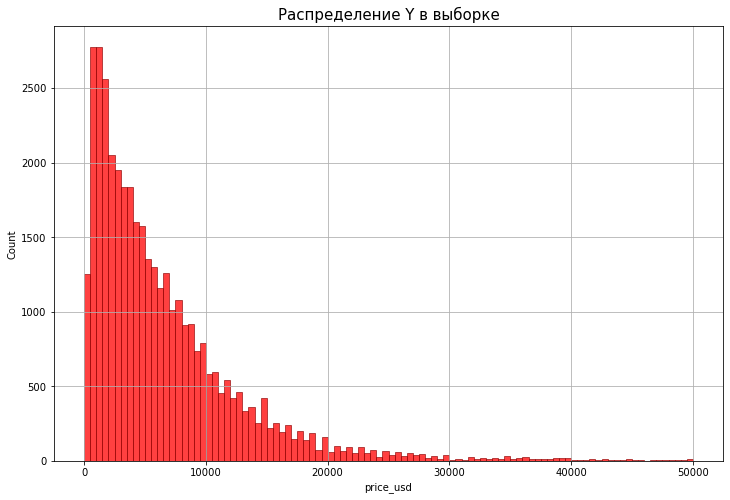

In [118]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title('Распределение Y в выборке', fontsize=15)
sns.histplot(df["price_usd"], bins=100, ax=ax, color='red', edgecolor="darkred")
plt.grid()
plt.show()

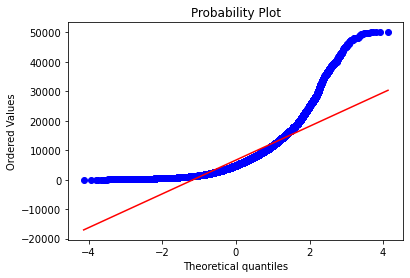

In [124]:
stats.probplot(df["price_usd"], dist="norm", plot=pylab) ##QQ Plot
pylab.show()

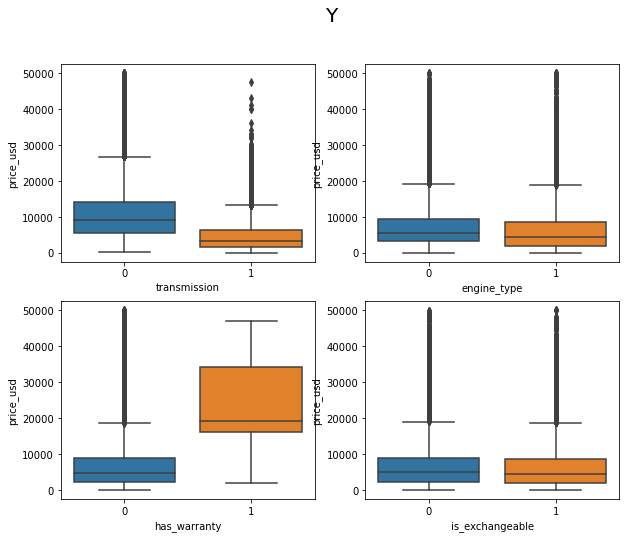

In [143]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
fig.suptitle('Y', fontsize=20)
sns.boxplot(data=df, y="price_usd", x="transmission",ax=axs[0,0])
sns.boxplot(data=df, y="price_usd", x="engine_type", ax=axs[0,1])
sns.boxplot(data=df, y="price_usd", x="has_warranty", ax=axs[1,0])
sns.boxplot(data=df, y="price_usd", x="is_exchangeable", ax=axs[1,1]);

In [144]:
from scipy.stats import chisquare

In [146]:
stat, pvalue = chisquare(df["price_usd"])

In [147]:
stat, pvalue

(239594640.51858383, 0.0)

If the p-value ≤ 0.05, then we reject the null hypothesis i.e. we assume the distribution of our variable is not normal/gaussian

In [148]:
from scipy.stats import jarque_bera

In [149]:
stat, pvalue = jarque_bera(df["price_usd"])

In [150]:
stat, pvalue

(117261.48463345513, 0.0)

If the p-value ≤ 0.05, then we reject the null hypothesis i.e. we assume the distribution of our variable is not normal/gaussian

In [151]:
from sklearn.linear_model import LinearRegression

In [157]:
x = df.drop(columns = "price_usd")
y = df["price_usd"]

In [163]:
model = LinearRegression().fit(x, y)

In [165]:
print(model.intercept_, model.coef_, model.score(x, y)) #последнее это R^2

-836196.560154984 [-6.85634735e-03  4.19705037e+02  2.34163292e+03  1.03679285e+02
  1.80338669e+00 -1.63346764e+03 -1.51129885e+03  9.24577807e+03
 -2.17524750e+02] 0.648251342795964


In [166]:
import statsmodels.api as sm

In [181]:
from statsmodels.formula.api import ols
# Analysis of Variance (ANOVA) on linear models
from statsmodels.stats.anova import anova_lm

In [167]:
x = sm.add_constant(x)

In [182]:
model = ols("price_usd ~ odometer_value", df).fit()

In [186]:
print(model.summary())

# Peform analysis of variance on fitted linear model
anova_results = anova_lm(model)

print('\nANOVA results')
print(anova_results)

                            OLS Regression Results                            
Dep. Variable:              price_usd   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     8296.
Date:                Thu, 08 Dec 2022   Prob (F-statistic):               0.00
Time:                        00:09:46   Log-Likelihood:            -3.8865e+05
No. Observations:               38521   AIC:                         7.773e+05
Df Residuals:                   38519   BIC:                         7.773e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.159e+04     61.912    187.